In [7]:
import cv2
import numpy as np

In [8]:
#required packages imported
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization
from keras .preprocessing.image import ImageDataGenerator

In [9]:
#generator(to make batches from dataset and create classes)
train_datagen= ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator =train_datagen.flow_from_directory(
    r'C:\Users\snigdh chamoli\OneDrive\Desktop\emotionde\archive\train',
    target_size=(48,48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical'
)
validation_generator=test_datagen.flow_from_directory(
    r'C:\Users\snigdh chamoli\OneDrive\Desktop\emotionde\archive\test',
    target_size=(48,48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical'
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [13]:
#create cnn model
model =Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(48,48,1)))
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding='valid'))
model.add(Dropout(0.25))


model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding='valid'))
model.add(Dropout(0.25))



model.add(Flatten())

model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(7,activation='softmax'))

In [14]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
mapping=model.fit_generator(
        train_generator,
        steps_per_epoch=28709// 64,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=7178// 64)

C:\Users\snigdh chamoli\AppData\Local\Temp\ipykernel_9420\3276251418.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  mapping=model.fit_generator(


Epoch 1/50
448/448 [==============================] - 507s 1s/step - loss: 1.9610 - accuracy: 0.3157 - val_loss: 1.6827 - val_accuracy: 0.3640
Epoch 2/50
448/448 [==============================] - 137s 307ms/step - loss: 1.5232 - accuracy: 0.4088 - val_loss: 1.5099 - val_accuracy: 0.4136
Epoch 3/50
448/448 [==============================] - 140s 312ms/step - loss: 1.4157 - accuracy: 0.4508 - val_loss: 1.4302 - val_accuracy: 0.4435
Epoch 4/50
448/448 [==============================] - 141s 314ms/step - loss: 1.3362 - accuracy: 0.4856 - val_loss: 1.2735 - val_accuracy: 0.5138
Epoch 5/50
448/448 [==============================] - 140s 314ms/step - loss: 1.2906 - accuracy: 0.5066 - val_loss: 1.2465 - val_accuracy: 0.5226
Epoch 6/50
448/448 [==============================] - 140s 312ms/step - loss: 1.2391 - accuracy: 0.5300 - val_loss: 1.1793 - val_accuracy: 0.5442
Epoch 7/50
448/448 [==============================] - 141s 315ms/step - loss: 1.1949 - accuracy: 0.5481 - val_loss: 1.2228 - va

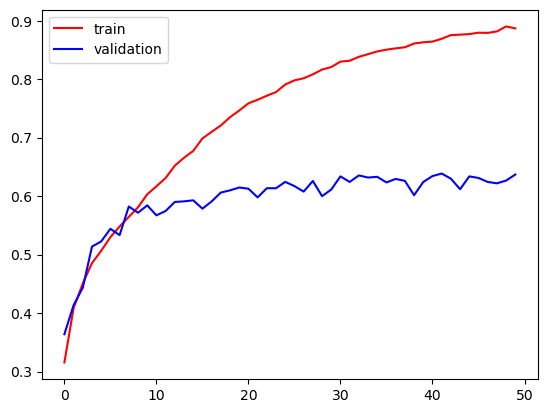

In [16]:
import matplotlib.pyplot as plt
plt.plot(mapping.history['accuracy'],color='red',label='train')
plt.plot(mapping.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [17]:
model_json=model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)

In [18]:
model.save_weights("model.h5")